In [1]:
import pandas as pd

# Load Customers data
customers_df = pd.read_csv("CUSTOMERS.csv")

# Load Sellers data
sellers_df = pd.read_csv("SELLERS.csv")

# Load Products data
products_df = pd.read_csv("PRODUCTS.csv")

# Load Orders data
orders_df = pd.read_csv("ORDERS.csv")

# Load Order Items data
order_items_df = pd.read_csv("ORDER_ITEMS.csv")

# Load Order Payments data
order_payments_df = pd.read_csv("ORDER_PAYMENTS.csv")

# Load Order Review Ratings data
order_review_ratings_df = pd.read_csv("ORDER_REVIEW_RATINGS.csv")

# Load Geo-Location data
geo_location_df = pd.read_csv("GEO_LOCATION.csv")


In [2]:
# Display column names for each table
print("Customers Table Columns:")
print(customers_df.columns)

print("\nSellers Table Columns:")
print(sellers_df.columns)

print("\nProducts Table Columns:")
print(products_df.columns)

print("\nOrders Table Columns:")
print(orders_df.columns)

print("\nOrder Items Table Columns:")
print(order_items_df.columns)

print("\nOrder Payments Table Columns:")
print(order_payments_df.columns)

print("\nOrder Review Ratings Table Columns:")
print(order_review_ratings_df.columns)

print("\nGeo-Location Table Columns:")
print(geo_location_df.columns)


Customers Table Columns:
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

Sellers Table Columns:
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

Products Table Columns:
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

Orders Table Columns:
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

Order Items Table Columns:
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

Order Payments Table Column

In [3]:
##a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total 
##   products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)


# Total Revenue
total_revenue = order_payments_df['payment_value'].sum()

# Total Quantity
total_quantity = order_items_df['order_item_id'].count()

# Total Products
total_products = products_df['product_id'].nunique()

# Total Categories
total_categories = products_df['product_category_name'].nunique()

# Total Sellers
total_sellers = sellers_df['seller_id'].nunique()

# Total Locations
total_locations = geo_location_df['geolocation_zip_code_prefix'].nunique()

# Total Channels
total_channels = order_payments_df['payment_type'].nunique()

# Total Payment Methods
total_payment_methods = order_payments_df['payment_type'].unique()

# Display the calculated metrics
print("High-Level Metrics:")
print("Total Revenue:", total_revenue)
print("Total Quantity:", total_quantity)
print("Total Products:", total_products)
print("Total Categories:", total_categories)
print("Total Sellers:", total_sellers)
print("Total Locations:", total_locations)
print("Total Channels:", total_channels)
print("Total Payment Methods:", total_payment_methods)


High-Level Metrics:
Total Revenue: 16008872.12
Total Quantity: 112650
Total Products: 32951
Total Categories: 71
Total Sellers: 3095
Total Locations: 19015
Total Channels: 5
Total Payment Methods: ['credit_card' 'UPI' 'voucher' 'debit_card' 'not_defined']


In [4]:
##b. Understanding how many new customers acquired every month



# Convert order_purchase_timestamp to datetime format
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Extract month and year from order_purchase_timestamp
orders_df['order_purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Group orders by month and count unique customer IDs
new_customers_per_month = orders_df.groupby('order_purchase_month')['customer_id'].nunique()

# Display the number of new customers acquired each month
print("Number of New Customers Acquired Every Month:")
print(new_customers_per_month)


Number of New Customers Acquired Every Month:
order_purchase_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: customer_id, dtype: int64


In [8]:
##c. Understand the retention of customers on month on month basis


# Group orders by customer and month, and count the number of orders per customer per month
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
orders_per_customer_month = orders_df.groupby(['customer_id', 'order_month']).size().reset_index(name='order_count')

# Identify customers who made repeat purchases in subsequent months
repeat_customers = orders_per_customer_month[orders_per_customer_month['order_count'] > 1]

# Group repeat customers by their first purchase month and count the number of unique customers
repeat_customers_first_month = repeat_customers.groupby('customer_id')['order_month'].min()
retained_customers = repeat_customers_first_month.groupby(repeat_customers_first_month).size()

# Calculate the total number of unique customers for each month
total_customers_per_month = orders_df.groupby('order_month')['customer_id'].nunique()

# Calculate the retention rate (percentage of retained customers) for each month
retention_rate = (retained_customers / total_customers_per_month) * 100

# Display the retention rate for each month
print("Customer Retention on Month-on-Month Basis:")
print(retention_rate)


Customer Retention on Month-on-Month Basis:
order_month
2016-09   NaN
2016-10   NaN
2016-12   NaN
2017-01   NaN
2017-02   NaN
2017-03   NaN
2017-04   NaN
2017-05   NaN
2017-06   NaN
2017-07   NaN
2017-08   NaN
2017-09   NaN
2017-10   NaN
2017-11   NaN
2017-12   NaN
2018-01   NaN
2018-02   NaN
2018-03   NaN
2018-04   NaN
2018-05   NaN
2018-06   NaN
2018-07   NaN
2018-08   NaN
2018-09   NaN
2018-10   NaN
Freq: M, dtype: float64


In [9]:
##d. How the revenues from existing/new customers on month on month basis

# Merge orders with order_payments to get payment information
order_payment_info = pd.merge(orders_df, order_payments_df, on='order_id', how='inner')

# Identify new customers by their first purchase month
new_customers_first_month = orders_df.groupby('customer_id')['order_month'].min()

# Mark orders as from existing or new customers based on their customer ID
order_payment_info['customer_type'] = 'Existing'
order_payment_info.loc[order_payment_info['customer_id'].isin(new_customers_first_month.index), 'customer_type'] = 'New'

# Calculate total revenue from existing and new customers for each month
revenue_by_customer_type = order_payment_info.groupby(['order_month', 'customer_type'])['payment_value'].sum().unstack(fill_value=0)

# Display the revenue from existing and new customers for each month
print("Revenue from Existing and New Customers on Month-on-Month Basis:")
print(revenue_by_customer_type)


Revenue from Existing and New Customers on Month-on-Month Basis:
customer_type         New
order_month              
2016-09            252.24
2016-10          59090.48
2016-12             19.62
2017-01         138488.04
2017-02         291908.01
2017-03         449863.60
2017-04         417788.03
2017-05         592918.82
2017-06         511276.38
2017-07         592382.92
2017-08         674396.32
2017-09         727762.45
2017-10         779677.88
2017-11        1194882.80
2017-12         878401.48
2018-01        1115004.18
2018-02         992463.34
2018-03        1159652.12
2018-04        1160785.48
2018-05        1153982.15
2018-06        1023880.50
2018-07        1066540.75
2018-08        1022425.32
2018-09           4439.54
2018-10            589.67


In [10]:
##e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

# Extract month from order_purchase_timestamp
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Merge orders with order_items to get product information
order_product_info = pd.merge(orders_df, order_items_df, on='order_id', how='inner')

# Calculate total sales revenue and quantity sold for each month
monthly_sales = order_product_info.groupby('order_month')['price'].sum()
monthly_quantity = order_product_info.groupby('order_month')['order_item_id'].count()

# Display the trends of sales revenue and quantity by month
print("Trends of Sales Revenue by Month:")
print(monthly_sales)
print("\nTrends of Quantity Sold by Month:")
print(monthly_quantity)


Trends of Sales Revenue by Month:
order_month
2016-09        267.36
2016-10      49507.66
2016-12         10.90
2017-01     120312.87
2017-02     247303.02
2017-03     374344.30
2017-04     359927.23
2017-05     506071.14
2017-06     433038.60
2017-07     498031.48
2017-08     573971.68
2017-09     624401.69
2017-10     664219.43
2017-11    1010271.37
2017-12     743914.17
2018-01     950030.36
2018-02     844178.71
2018-03     983213.44
2018-04     996647.75
2018-05     996517.68
2018-06     865124.31
2018-07     895507.22
2018-08     854686.33
2018-09        145.00
Freq: M, Name: price, dtype: float64

Trends of Quantity Sold by Month:
order_month
2016-09       6
2016-10     363
2016-12       1
2017-01     955
2017-02    1951
2017-03    3000
2017-04    2684
2017-05    4136
2017-06    3583
2017-07    4519
2017-08    4910
2017-09    4831
2017-10    5322
2017-11    8665
2017-12    6308
2018-01    8208
2018-02    7672
2018-03    8217
2018-04    7975
2018-05    7925
2018-06    7078
2018-0

In [11]:
##e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…



# Merge order_product_info with products to get product category information
order_product_category = pd.merge(order_product_info, products_df[['product_id', 'product_category_name']], on='product_id', how='inner')

# Calculate total sales revenue and quantity sold for each product category
category_sales = order_product_category.groupby('product_category_name')['price'].sum().sort_values(ascending=False)
category_quantity = order_product_category.groupby('product_category_name')['order_item_id'].count().sort_values(ascending=False)

# Display the total sales revenue and quantity sold by category
print("Total Sales Revenue by Category:")
print(category_sales)
print("\nTotal Quantity Sold by Category:")
print(category_quantity)


Total Sales Revenue by Category:
product_category_name
Health_Beauty                1258681.34
Watches_Gifts                1205005.68
Bed_Bath_Table               1036988.68
Sports_Leisure                988048.97
Computers_Accessories         911954.32
                                ...    
Flowers                         1110.04
Home_Comfort_2                   760.27
Cds_Dvds_Musicals                730.00
Fashion_Childrens_Clothes        569.85
Security_And_Services            283.29
Name: price, Length: 71, dtype: float64

Total Quantity Sold by Category:
product_category_name
Bed_Bath_Table               11115
Health_Beauty                 9670
Sports_Leisure                8641
Furniture_Decor               8334
Computers_Accessories         7827
                             ...  
Arts_And_Craftmanship           24
La_Cuisine                      14
Cds_Dvds_Musicals               14
Fashion_Childrens_Clothes        8
Security_And_Services            2
Name: order_item_id, Len

In [14]:
##e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…


# Merge order_product_info with customers_df to get customer location information
order_location_info = pd.merge(order_product_info, customers_df[['customer_id', 'customer_zip_code_prefix']], on='customer_id', how='inner')
order_location_info = pd.merge(order_location_info, geo_location_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

# Calculate total sales revenue and quantity sold for each location
location_sales = order_location_info.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])['price'].sum().sort_values(ascending=False)
location_quantity = order_location_info.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])['order_item_id'].count().sort_values(ascending=False)

# Display the total sales revenue and quantity sold by location
print("Total Sales Revenue by Location:")
print(location_sales)
print("\nTotal Quantity Sold by Location:")
print(location_quantity)


Total Sales Revenue by Location:
geolocation_zip_code_prefix  geolocation_city   geolocation_state
22790                        Badepalle          Andhra Pradesh       22154.89
35501                        Jallaram Kamanpur  Andhra Pradesh       18061.03
24220                        Jaggayyapet        Andhra Pradesh       17727.17
28970                        Jasdan             Gujarat              17199.19
22793                        Badepalle          Andhra Pradesh       17167.70
                                                                       ...   
35880                        Nagojanahalli      Tamil Nadu               6.00
86720                        Vellore            Tamil Nadu               5.90
4290                         Akkarampalle       Andhra Pradesh           5.73
66814                        Kuppam             Andhra Pradesh           4.99
25907                        Anklav             Gujarat                  3.54
Name: price, Length: 14820, dtype: float64


In [15]:
##e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…


# Calculate total sales revenue and quantity sold by month
monthly_sales = order_product_info.groupby(order_product_info['order_purchase_timestamp'].dt.to_period('M'))['price'].sum()
monthly_quantity = order_product_info.groupby(order_product_info['order_purchase_timestamp'].dt.to_period('M'))['order_item_id'].count()

# Calculate total sales revenue and quantity sold by week
weekly_sales = order_product_info.groupby(order_product_info['order_purchase_timestamp'].dt.to_period('W'))['price'].sum()
weekly_quantity = order_product_info.groupby(order_product_info['order_purchase_timestamp'].dt.to_period('W'))['order_item_id'].count()

# Calculate total sales revenue and quantity sold by day of the week
daily_sales = order_product_info.groupby(order_product_info['order_purchase_timestamp'].dt.dayofweek)['price'].sum()
daily_quantity = order_product_info.groupby(order_product_info['order_purchase_timestamp'].dt.dayofweek)['order_item_id'].count()

# Display the trends of sales revenue and quantity by month, week, and day of the week
print("Trends of Sales Revenue by Month:")
print(monthly_sales)
print("\nTrends of Quantity Sold by Month:")
print(monthly_quantity)
print("\nTrends of Sales Revenue by Week:")
print(weekly_sales)
print("\nTrends of Quantity Sold by Week:")
print(weekly_quantity)
print("\nTrends of Sales Revenue by Day of the Week:")
print(daily_sales)
print("\nTrends of Quantity Sold by Day of the Week:")
print(daily_quantity)


Trends of Sales Revenue by Month:
order_purchase_timestamp
2016-09        267.36
2016-10      49507.66
2016-12         10.90
2017-01     120312.87
2017-02     247303.02
2017-03     374344.30
2017-04     359927.23
2017-05     506071.14
2017-06     433038.60
2017-07     498031.48
2017-08     573971.68
2017-09     624401.69
2017-10     664219.43
2017-11    1010271.37
2017-12     743914.17
2018-01     950030.36
2018-02     844178.71
2018-03     983213.44
2018-04     996647.75
2018-05     996517.68
2018-06     865124.31
2018-07     895507.22
2018-08     854686.33
2018-09        145.00
Freq: M, Name: price, dtype: float64

Trends of Quantity Sold by Month:
order_purchase_timestamp
2016-09       6
2016-10     363
2016-12       1
2017-01     955
2017-02    1951
2017-03    3000
2017-04    2684
2017-05    4136
2017-06    3583
2017-07    4519
2017-08    4910
2017-09    4831
2017-10    5322
2017-11    8665
2017-12    6308
2018-01    8208
2018-02    7672
2018-03    8217
2018-04    7975
2018-05    7

In [16]:
##e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…


# Calculate total sales revenue and quantity sold by hour of the day
hourly_sales = order_product_info.groupby(order_product_info['order_purchase_timestamp'].dt.hour)['price'].sum()
hourly_quantity = order_product_info.groupby(order_product_info['order_purchase_timestamp'].dt.hour)['order_item_id'].count()

# Display the trends of sales revenue and quantity by hour of the day
print("Trends of Sales Revenue by Hour of the Day:")
print(hourly_sales)
print("\nTrends of Quantity Sold by Hour of the Day:")
print(hourly_quantity)


Trends of Sales Revenue by Hour of the Day:
order_purchase_timestamp
0     316817.97
1     150011.92
2      54833.01
3      35525.11
4      24281.59
5      22395.52
6      57212.71
7     152912.12
8     391527.38
9     679890.41
10    835327.68
11    875456.09
12    847175.54
13    871733.99
14    948289.93
15    903245.09
16    935293.71
17    838911.74
18    821292.31
19    823441.24
20    853886.40
21    838301.95
22    787403.22
23    526477.07
Name: price, dtype: float64

Trends of Quantity Sold by Hour of the Day:
order_purchase_timestamp
0     2717
1     1289
2      584
3      314
4      244
5      218
6      556
7     1377
8     3377
9     5449
10    7034
11    7432
12    6819
13    7403
14    7565
15    7370
16    7653
17    7010
18    6550
19    6716
20    6875
21    6920
22    6541
23    4637
Name: order_item_id, dtype: int64


In [19]:
##e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…


# Calculate total sales revenue and quantity sold by payment method
payment_sales = order_payment_info.groupby('payment_type')['payment_value'].sum()
payment_quantity = order_payment_info.groupby('payment_type')['order_id'].count()

# Display the trends of sales revenue and quantity by payment method
print("Trends of Sales Revenue by Payment Method:")
print(payment_sales)
print("\nTrends of Quantity Sold by Payment Method:")
print(payment_quantity)


Trends of Sales Revenue by Payment Method:
payment_type
UPI             4059699.60
credit_card    15589028.22
debit_card       253533.86
voucher          405873.03
Name: payment_value, dtype: float64

Trends of Quantity Sold by Payment Method:
payment_type
UPI            22867
credit_card    86769
debit_card      1691
voucher         6274
Name: order_id, dtype: int64


In [20]:
##f. Popular Products by month, seller, state, category.

# Calculate top-selling products by month based on sales revenue
top_products_month = order_product_info.groupby(['order_month', 'product_id'])['price'].sum().reset_index()
top_products_month = top_products_month.sort_values(by=['order_month', 'price'], ascending=[True, False])
top_products_month = top_products_month.groupby('order_month').head(10)

# Calculate top-selling products by seller based on sales revenue
top_products_seller = order_product_info.groupby(['seller_id', 'product_id'])['price'].sum().reset_index()
top_products_seller = top_products_seller.sort_values(by=['seller_id', 'price'], ascending=[True, False])
top_products_seller = top_products_seller.groupby('seller_id').head(10)

# Calculate top-selling products by state based on sales revenue
top_products_state = order_location_info.groupby(['geolocation_state', 'product_id'])['price'].sum().reset_index()
top_products_state = top_products_state.sort_values(by=['geolocation_state', 'price'], ascending=[True, False])
top_products_state = top_products_state.groupby('geolocation_state').head(10)

# Calculate top-selling products by category based on sales revenue
top_products_category = order_product_category.groupby(['product_category_name', 'product_id'])['price'].sum().reset_index()
top_products_category = top_products_category.sort_values(by=['product_category_name', 'price'], ascending=[True, False])
top_products_category = top_products_category.groupby('product_category_name').head(10)

# Concatenate all dataframes into one
top_products = pd.concat([top_products_month, top_products_seller, top_products_state, top_products_category], ignore_index=True)

# Display the merged dataframe
print("Top-selling Products by Month, Seller, State, and Category:")
print(top_products)


Top-selling Products by Month, Seller, State, and Category:
      order_month                        product_id     price seller_id  \
0         2016-09  5a6b04657a4c5ee34285d1e4619a96b4    134.97       NaN   
1         2016-09  f3c2d01a84c947b078e32bbef0718962     59.50       NaN   
2         2016-09  c1488892604e4ba5cff5b4eb4d595400     39.99       NaN   
3         2016-09  f293394c72c9b5fafd7023301fc21fc2     32.90       NaN   
4         2016-10  eba7488e1c67729f045ab43fac426f2e   2748.90       NaN   
...           ...                               ...       ...       ...   
16498         NaT  a62e25e09e05e6faf31d90c6ec1aa3d1  24051.00       NaN   
16499         NaT  461f43be3bdf8844e65b62d9ac2c7a5a  20593.22       NaN   
16500         NaT  6f3b5b605d91b7439c5e3f5a8dffeea7  19009.40       NaN   
16501         NaT  1a080577618e7fe4d9ddd8fb2b47a964  18262.96       NaN   
16502         NaT  a92930c327948861c015c919a0bcb4a8  12475.00       NaN   

      geolocation_state product_categor

In [28]:
##g. Popular categories by state, month

# Calculate top-selling products by month based on sales revenue
top_products_month = order_product_info.groupby(['order_month', 'product_id'])['price'].sum().reset_index()
top_products_month = top_products_month.sort_values(by=['order_month', 'price'], ascending=[True, False])
top_products_month = top_products_month.groupby('order_month').head(10)

# Calculate top-selling products by seller based on sales revenue
top_products_seller = order_product_info.groupby(['seller_id', 'product_id'])['price'].sum().reset_index()
top_products_seller = top_products_seller.sort_values(by=['seller_id', 'price'], ascending=[True, False])
top_products_seller = top_products_seller.groupby('seller_id').head(10)

# Calculate top-selling products by state based on sales revenue
top_products_state = order_location_info.groupby(['geolocation_state', 'product_id'])['price'].sum().reset_index()
top_products_state = top_products_state.sort_values(by=['geolocation_state', 'price'], ascending=[True, False])
top_products_state = top_products_state.groupby('geolocation_state').head(10)

# Calculate top-selling products by category based on sales revenue
top_products_category = order_product_category.groupby(['product_category_name', 'product_id'])['price'].sum().reset_index()
top_products_category = top_products_category.sort_values(by=['product_category_name', 'price'], ascending=[True, False])
top_products_category = top_products_category.groupby('product_category_name').head(10)

# Merge order_location_info with products_df to get product category information
order_product_info = pd.merge(order_location_info, products_df[['product_id', 'product_category_name']], on='product_id', how='inner')

# Calculate top-selling categories by state based on sales revenue
top_categories_state = order_product_info.groupby(['geolocation_state', 'product_category_name'])['price'].sum().reset_index()
top_categories_state = top_categories_state.sort_values(by=['geolocation_state', 'price'], ascending=[True, False])
top_categories_state = top_categories_state.groupby('geolocation_state').head(10)


# Calculate top-selling categories by month based on sales revenue
top_categories_month = order_product_info.groupby(['order_month', 'product_category_name'])['price'].sum().reset_index()
top_categories_month = top_categories_month.sort_values(by=['order_month', 'price'], ascending=[True, False])
top_categories_month = top_categories_month.groupby('order_month').head(10)

# Concatenate all dataframes into one
top_products = pd.concat([top_products_month, top_products_seller, top_products_state, top_products_category], ignore_index=True)
top_categories = pd.concat([top_categories_state, top_categories_month], ignore_index=True)

# Display the merged dataframes
print("Top-selling Products by Month, Seller, State, and Category:")
print(top_products)

print("\nTop-selling Categories by State and Month:")
print(top_categories)


Top-selling Products by Month, Seller, State, and Category:
      order_month                        product_id     price seller_id  \
0         2016-09  5a6b04657a4c5ee34285d1e4619a96b4    134.97       NaN   
1         2016-09  f3c2d01a84c947b078e32bbef0718962     59.50       NaN   
2         2016-09  c1488892604e4ba5cff5b4eb4d595400     39.99       NaN   
3         2016-09  f293394c72c9b5fafd7023301fc21fc2     32.90       NaN   
4         2016-10  eba7488e1c67729f045ab43fac426f2e   2748.90       NaN   
...           ...                               ...       ...       ...   
16498         NaT  a62e25e09e05e6faf31d90c6ec1aa3d1  24051.00       NaN   
16499         NaT  461f43be3bdf8844e65b62d9ac2c7a5a  20593.22       NaN   
16500         NaT  6f3b5b605d91b7439c5e3f5a8dffeea7  19009.40       NaN   
16501         NaT  1a080577618e7fe4d9ddd8fb2b47a964  18262.96       NaN   
16502         NaT  a92930c327948861c015c919a0bcb4a8  12475.00       NaN   

      geolocation_state product_categor

In [33]:
##h. List top 10 most expensive products sorted by price


top_expensive_products = products_df.sort_values(by='product_weight_g', ascending=False).head(10)
print(top_expensive_products)


                             product_id           product_category_name  \
25166  26644690fde745fc4654719c3904e1db                  Bed_Bath_Table   
2417   343c15a347e523f2b6cf38a5db81e179                  Sports_Leisure   
4814   0984eaa8480e41aded35bd7b5131a1c1                   Health_Beauty   
15982  c100e5fef1abb5e1c5054d1dac2d83ac                   Health_Beauty   
23581  a8baceb529f7e2a5c770cc5b4e3da35d                   Health_Beauty   
7234   8d6f2c3454002d3f5aa7479a7fad7794           Furniture_Living_Room   
31113  ed6e17c5f34a20c7569b6ac2597ee223                            Auto   
26724  cd1db0c97e4b3644bb52432611e09c58                 Furniture_Decor   
4594   e6574cebbeb21c82802d3a0b682129b6                  Sports_Leisure   
4655   027293c3b6d9e221268d9d6a5ffe5d0b  Industry_Commerce_And_Business   

       product_name_lenght  product_description_lenght  product_photos_qty  \
25166                 59.0                       534.0                 1.0   
2417              

In [51]:
##2. Performing Customers/sellers Segmentation
##a. Divide the customers into groups based on the revenue generated 

# Step 1: Calculate revenue generated by each customer
customer_revenue = order_info_df.groupby('customer_id')['payment_value'].sum()

# Step 2: Divide customers into groups based on revenue
# For simplicity, let's divide them into three groups: Low, Medium, and High
customer_segments = pd.cut(customer_revenue, bins=3, labels=['Low', 'Medium', 'High'])

# Step 3: Create a DataFrame to store customer segments
customer_segments_df = pd.DataFrame({'customer_id': customer_revenue.index, 'revenue_segment': customer_segments})

# Step 4: Reset the index of customer_segments_df to avoid ambiguity
customer_segments_df_reset = customer_segments_df.reset_index(drop=True)

# Step 5: Merge customer segments with customer information
customer_segments_info = pd.merge(customers_df, customer_segments_df_reset, on='customer_id', how='left')

# Display the merged DataFrame
print(customer_segments_info)



                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix customer_city  customer_state revenue_segme

In [52]:
##2. Performing Customers/sellers Segmentation
##b. Divide the sellers into groups based on the revenue generated 


# Step 1: Calculate revenue generated by each seller
seller_revenue = order_items_df.groupby('seller_id')['price'].sum()

# Step 2: Divide sellers into groups based on revenue
# For simplicity, let's divide them into three groups: Low, Medium, and High
seller_segments = pd.cut(seller_revenue, bins=3, labels=['Low', 'Medium', 'High'])

# Step 3: Create a DataFrame to store seller segments
seller_segments_df = pd.DataFrame({'seller_id': seller_revenue.index, 'revenue_segment': seller_segments})

# Step 4: Reset the index of seller_segments_df to avoid ambiguity
seller_segments_df_reset = seller_segments_df.reset_index(drop=True)

# Step 5: Merge seller segments with seller information
seller_segments_info = pd.merge(sellers_df, seller_segments_df_reset, on='seller_id', how='left')

# Display the merged DataFrame
print(seller_segments_info)


                             seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13023   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

          seller_city    seller_state revenue_segment  
0               Alwal  Andhra Pradesh             Low  
1               Alwal  Andhra Pradesh             Low  
2           Badepalle  Andhra Pradesh  

In [53]:
##3. Cross-Selling (Which products are selling together)


from itertools import combinations
from collections import Counter

# Step 1: Generate all possible combinations of products within each order
order_product_combinations = []

for order_id, group in order_items_df.groupby('order_id'):
    products = group['product_id'].tolist()
    product_combinations = combinations(products, 2)  # Change 2 to 3 for combinations of 3 products
    order_product_combinations.extend(product_combinations)

# Step 2: Count the frequency of each product combination
combination_counts = Counter(order_product_combinations)

# Step 3: Identify the top combinations of products based on their frequency
top_combinations = combination_counts.most_common(10)

# Display the top combinations
for combination, count in top_combinations:
    print(f"Combination: {combination}, Frequency: {count}")


Combination: ('422879e10f46682990de24d770e7f83d', '422879e10f46682990de24d770e7f83d'), Frequency: 279
Combination: ('ee3d532c8a438679776d222e997606b3', 'ee3d532c8a438679776d222e997606b3'), Frequency: 195
Combination: ('9571759451b1d780ee7c15012ea109d4', '9571759451b1d780ee7c15012ea109d4'), Frequency: 190
Combination: ('a62e25e09e05e6faf31d90c6ec1aa3d1', 'a62e25e09e05e6faf31d90c6ec1aa3d1'), Frequency: 141
Combination: ('368c6c730842d78016ad823897a372db', '368c6c730842d78016ad823897a372db'), Frequency: 139
Combination: ('b532349fe46b38fbc7bb3914c1bdae07', 'b532349fe46b38fbc7bb3914c1bdae07'), Frequency: 134
Combination: ('d5991653e037ccb7af6ed7d94246b249', 'd5991653e037ccb7af6ed7d94246b249'), Frequency: 123
Combination: ('53759a2ecddad2bb87a079a1f1519f73', '53759a2ecddad2bb87a079a1f1519f73'), Frequency: 119
Combination: ('89b190a046022486c635022524a974a8', '89b190a046022486c635022524a974a8'), Frequency: 115
Combination: ('aca2eb7d00ea1a7b8ebd4e68314663af', 'aca2eb7d00ea1a7b8ebd4e68314663a

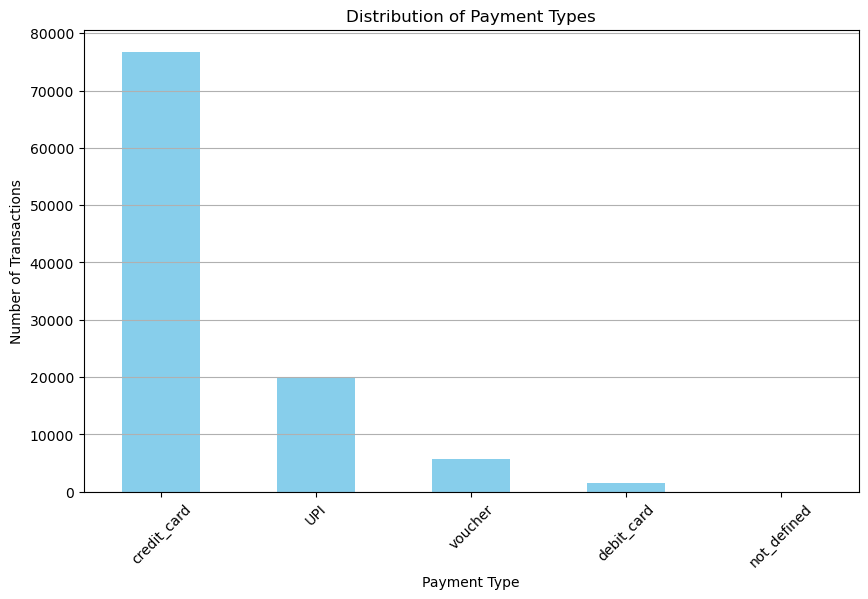

In [54]:
##4. Payment Behaviour
##a. How customers are paying?

import matplotlib.pyplot as plt

# Step 1: Group the data by payment type and count the occurrences of each payment type
payment_counts = order_payments_df['payment_type'].value_counts()

# Step 2: Plot the distribution of payment types
plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Payment Channels Used by Most Customers:
payment_type
credit_card    73.922376
UPI            19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: count, dtype: float64


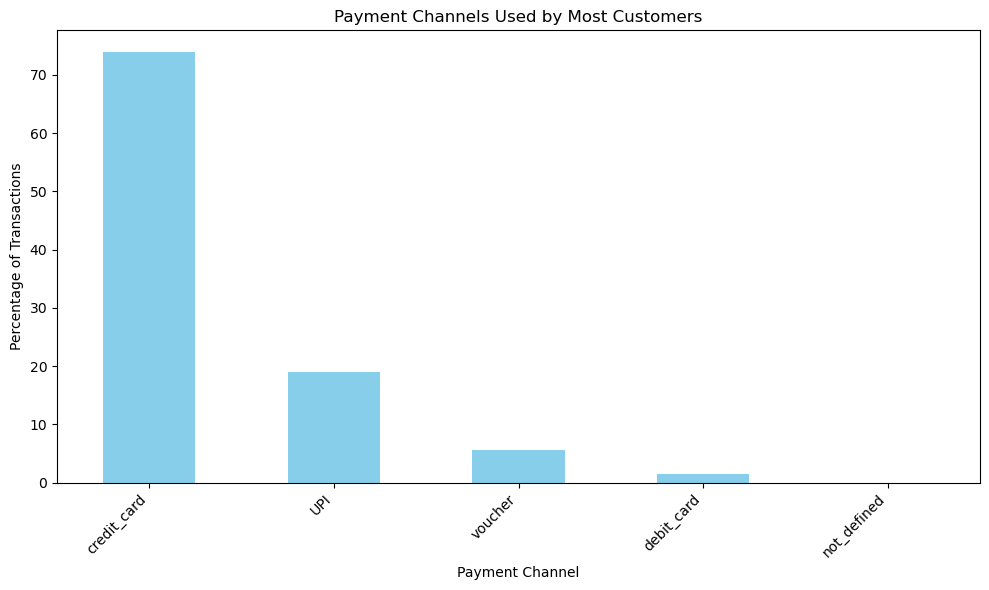

In [56]:
##b. Which payment channels are used by most customers?

# Step 1: Calculate the percentage of transactions for each payment channel
payment_channel_percentage = (order_payments_df['payment_type'].value_counts() / len(order_payments_df)) * 100

# Step 2: Sort the payment channels by percentage in descending order
payment_channel_percentage = payment_channel_percentage.sort_values(ascending=False)

# Step 3: Print the payment channels and their respective percentages
print("Payment Channels Used by Most Customers:")
print(payment_channel_percentage)

import matplotlib.pyplot as plt

# Plotting the payment channels and their percentages
plt.figure(figsize=(10, 6))
payment_channel_percentage.plot(kind='bar', color='skyblue')
plt.title('Payment Channels Used by Most Customers')
plt.xlabel('Payment Channel')
plt.ylabel('Percentage of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 Maximum Rated Categories:
product_category_name
Cds_Dvds_Musicals                        4.642857
Fashion_Childrens_Clothes                4.500000
Books_General_Interest                   4.439421
Books_Imported                           4.400000
Costruction_Tools_Tools                  4.359223
Books_Technical                          4.338290
Luggage_Accessories                      4.309524
Food_Drink                               4.303571
Small_Appliances_Home_Oven_And_Coffee    4.302632
Fashion_Sport                            4.258065
Name: review_score, dtype: float64

Top 10 Minimum Rated Categories:
product_category_name
Security_And_Services     2.500000
Diapers_And_Hygiene       3.256410
Home_Comfort_2            3.366667
Office_Furniture          3.484421
Fashion_Male_Clothing     3.621212
Fixed_Telephony           3.671698
Party_Supplies            3.767442
Fashio_Female_Clothing    3.780000
La_Cuisine                3.785714
Audio                     3.808219
Name

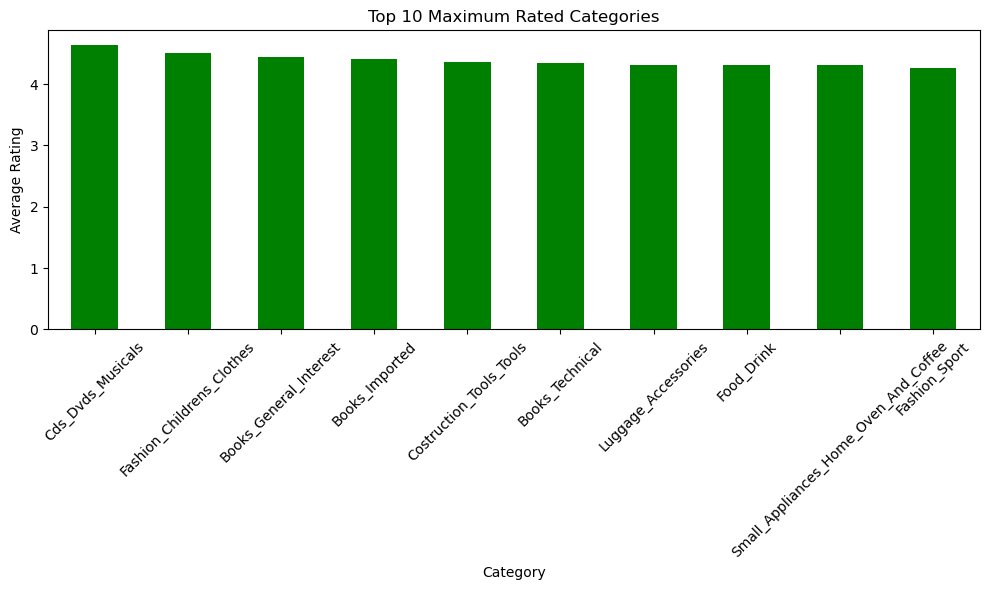

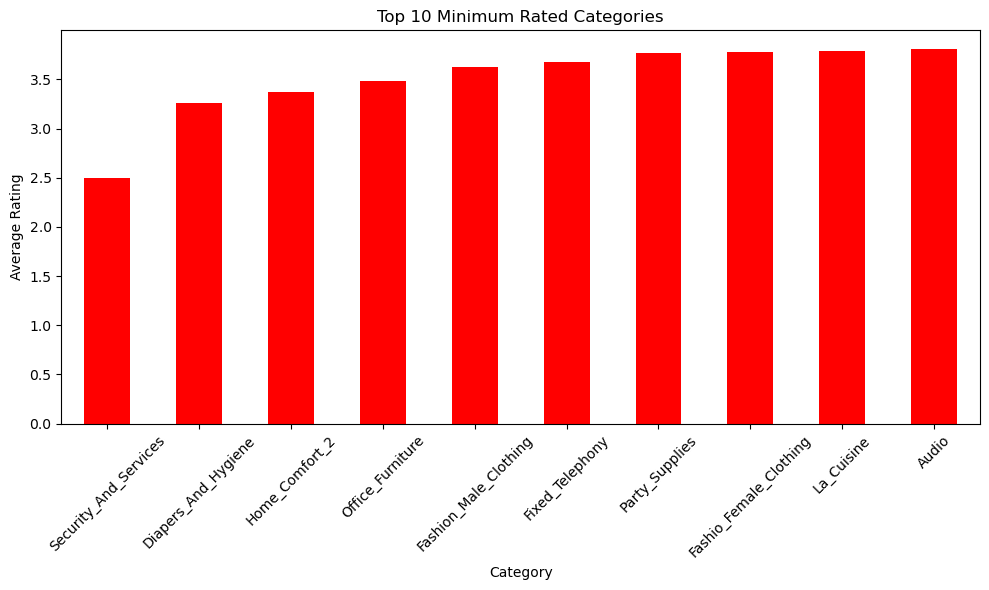

In [74]:
##5. Customer satisfaction towards category & product
##a. Which categories (top 10) are maximum rated & minimum rated?

# Step 1: Merge order_review_ratings_df with order_items_df
merged_df = pd.merge(order_review_ratings_df, order_items_df, on='order_id', how='inner')

# Step 2: Merge with products_df to get product_category_name
merged_df = pd.merge(merged_df, products_df[['product_id', 'product_category_name']], on='product_id', how='inner')

# Step 3: Group by product_category_name and calculate mean review score
category_avg_rating = merged_df.groupby('product_category_name')['review_score'].mean()

# Step 4: Find top 10 maximum and minimum rated categories
top_10_max_rated_categories = category_avg_rating.nlargest(10)
top_10_min_rated_categories = category_avg_rating.nsmallest(10)

print("Top 10 Maximum Rated Categories:")
print(top_10_max_rated_categories)

print("\nTop 10 Minimum Rated Categories:")
print(top_10_min_rated_categories)


import matplotlib.pyplot as plt

# Plotting the top 10 maximum rated categories
plt.figure(figsize=(10, 6))
top_10_max_rated_categories.plot(kind='bar', color='green')
plt.title('Top 10 Maximum Rated Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the top 10 minimum rated categories
plt.figure(figsize=(10, 6))
top_10_min_rated_categories.plot(kind='bar', color='red')
plt.title('Top 10 Minimum Rated Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Top 10 Maximum Rated Products:
product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
000b8f95fcb9e0096488278317764d19    5.0
000d9be29b5207b54e86aa1b1ac54872    5.0
00126f27c813603687e6ce486d909d01    5.0
001b237c0e9bb435f2e54071129237e9    5.0
001c5d71ac6ad696d22315953758fa04    5.0
0021a87d4997a48b6cef1665602be0f5    5.0
002959d7a0b0990fe2d69988affcbc80    5.0
002af88741ba70c7b5cf4e4a0ad7ef85    5.0
002c6dab60557c48cfd6c2222ef7fd76    5.0
Name: review_score, dtype: float64

Top 10 Minimum Rated Products:
product_id
0009406fd7479715e4bef61dd91f2462    1.0
0011c512eb256aa0dbbb544d8dffcf6e    1.0
002d4ea7c04739c130bb74d7e7cd1694    1.0
0043c62d00db47eff6a6bc4cf6bfaeda    1.0
0043d1a25ef08fb6f41b8fa6f91742ab    1.0
0060b415594c5e1200324ef1a18493c4    1.0
00cf06147ed4880ec5fbba2adbb20e1d    1.0
00e62bcf9337ca4c5d5b4c5c8188f8d2    1.0
00efb9a8ce0cf3b2f37892ab003edc10    1.0
0103863bf3441460142ec23c74388e4c    1.0
Name: review_score, dtype: float64


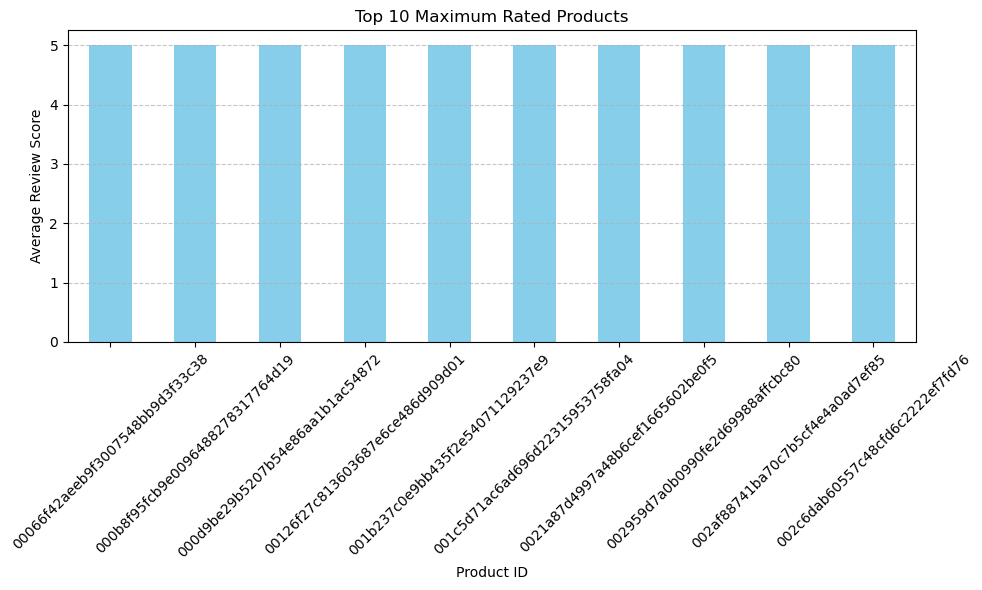

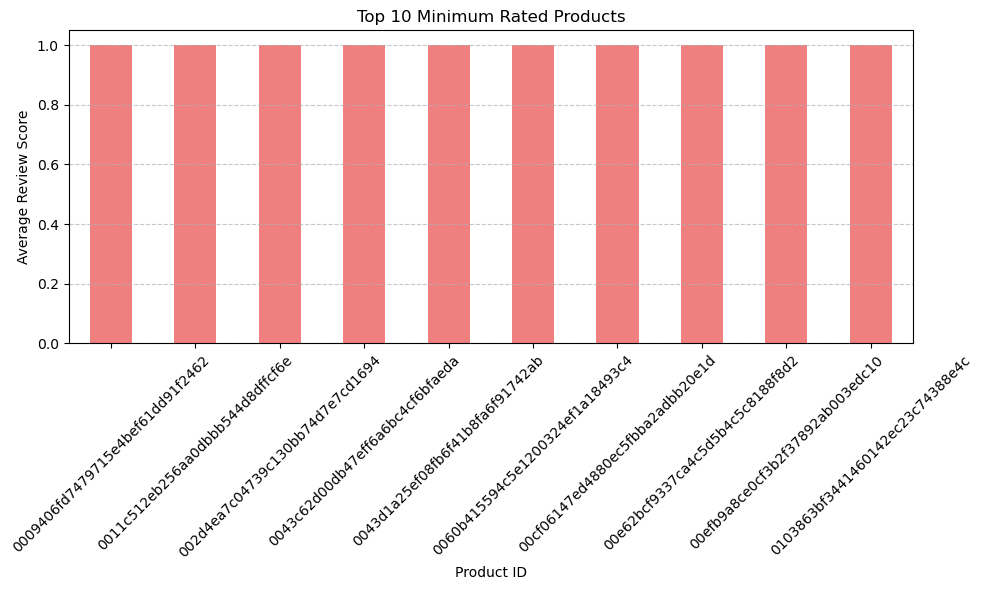

In [81]:
##b. Which products (top10) are maximum rated & minimum rated?

# Merge order items with order review ratings on order_id to associate each product with its review score
merged_order_items_reviews = pd.merge(order_items_df, order_review_ratings_df, how='inner', on='order_id')

# Calculate average review score for each product
product_avg_rating = merged_order_items_reviews.groupby('product_id')['review_score'].mean()

# Find the top 10 maximum rated products
top_10_max_rated_products = product_avg_rating.nlargest(10)

# Find the top 10 minimum rated products
top_10_min_rated_products = product_avg_rating.nsmallest(10)

print("Top 10 Maximum Rated Products:")
print(top_10_max_rated_products)

print("\nTop 10 Minimum Rated Products:")
print(top_10_min_rated_products)


import matplotlib.pyplot as plt

# Plotting the top 10 maximum rated products
plt.figure(figsize=(10, 6))
top_10_max_rated_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Maximum Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the top 10 minimum rated products
plt.figure(figsize=(10, 6))
top_10_min_rated_products.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Minimum Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.666667
001cca7ae9ae17fb1caed9dfb1094831    3.874477
001e6ad469a905060d959994f1b41e4f    1.000000
002100f778ceb8431b7a1020ff7ab48f    3.982143
003554e2dce176b5555353e4f3555ac8    5.000000
                                      ...   
ffcfefa19b08742c5d315f2791395ee5    1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3    4.250000
ffeee66ac5d5a62fe688b9d26f83f534    4.214286
fffd5413c0700ac820c7069d66d98c89    3.885246
ffff564a4f9085cd26170f4732393726    2.100000
Name: review_score, Length: 3095, dtype: float64
product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
00088930e925c41fd95ebfe695fd2655    4.0
0009406fd7479715e4bef61dd91f2462    1.0
000b8f95fcb9e0096488278317764d19    5.0
000d9be29b5207b54e86aa1b1ac54872    5.0
                                   ... 
fff6177642830a9a94a0f2cba5e476d1    4.5
fff81cc3158d2725c0655ab9ba0f712c    4.0
fff9553ac224cec9d15d49f5a263411f    5.0
fffdb2d0ec8d6a61f0a0a0db3f25b441    5.0
fffe9eeff12fcbd74a2f2b007dde0c58   

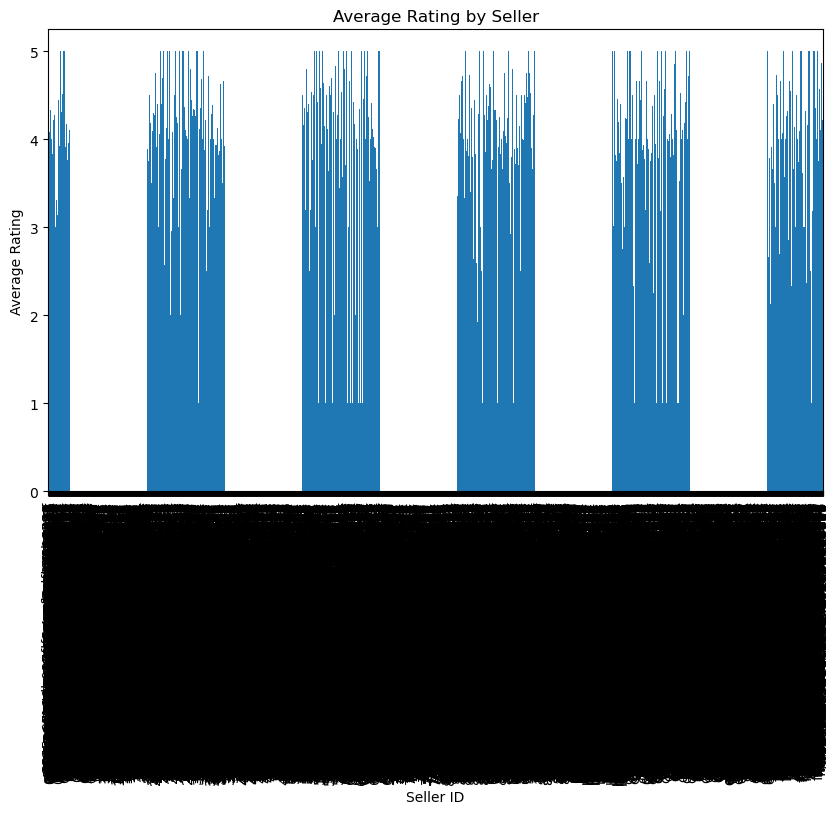

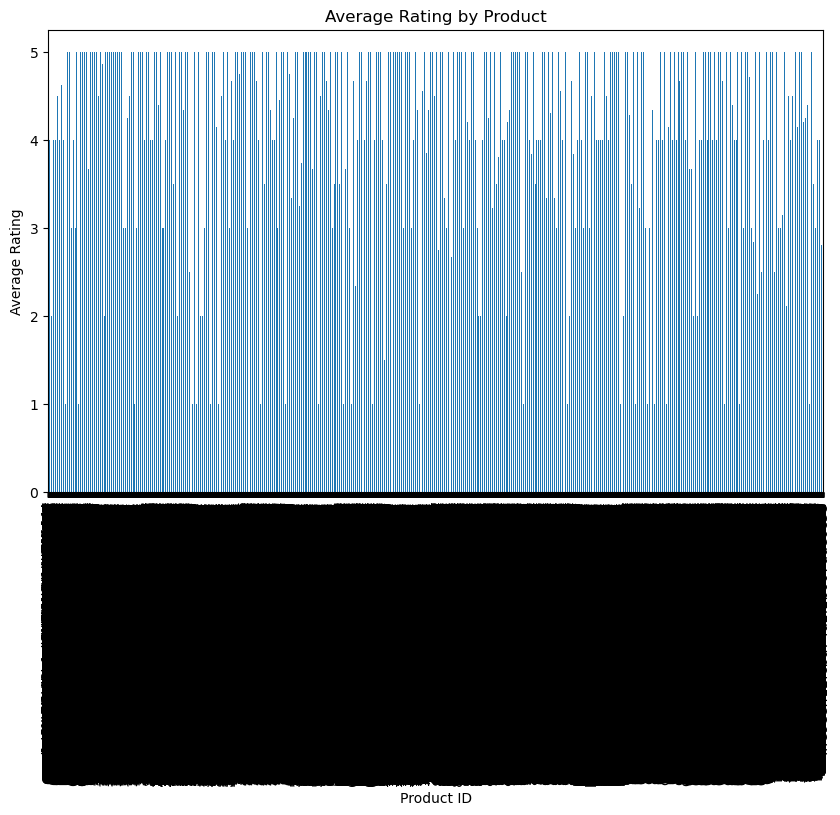

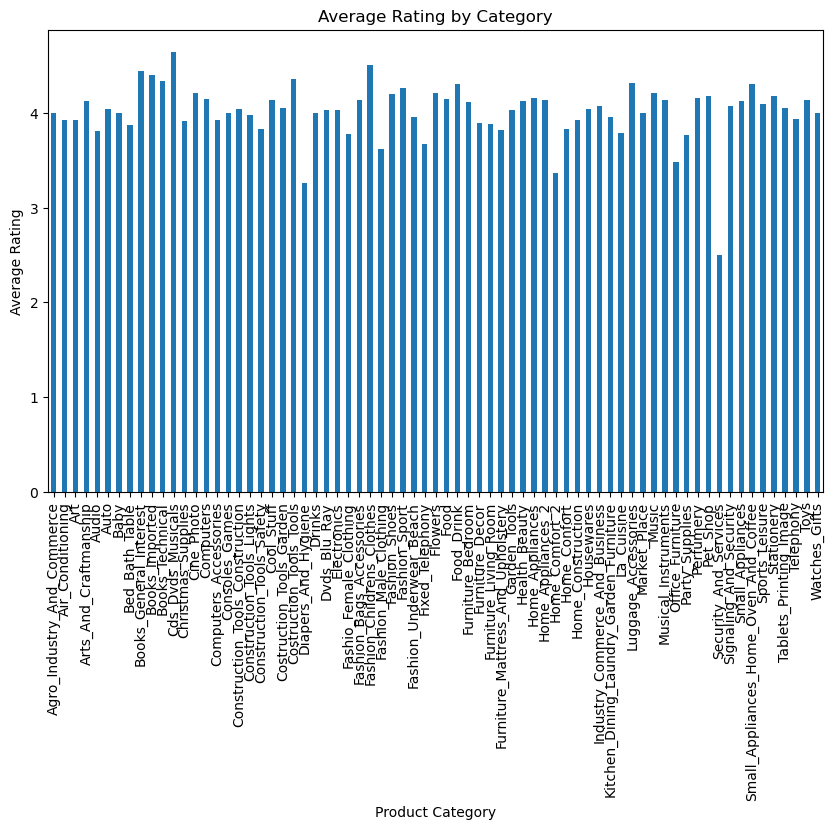

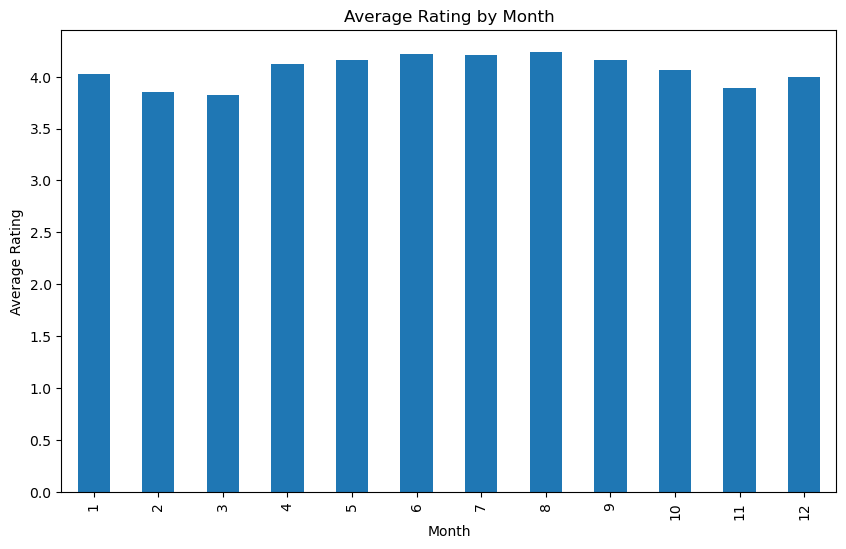

In [104]:
##c. Average rating by seller, product, category, month etc.


# Merge Sellers and Order Items dataframes
merged_sellers_order_items = pd.merge(sellers_df, order_items_df, how='inner', on='seller_id')

# Merge the above result with Order Review Ratings dataframe
merged_sellers_order_review = pd.merge(merged_sellers_order_items, order_review_ratings_df, how='inner', on='order_id')

# Calculate average rating by seller
seller_avg_rating = merged_sellers_order_review.groupby('seller_id')['review_score'].mean()

#######

# Merge order items with products on product_id
merged_order_items_products = pd.merge(order_items_df, products_df, on='product_id', how='inner')

# Merge order review ratings with the merged data on order_id
merged_products_ratings = pd.merge(merged_order_items_products, order_review_ratings_df, on='order_id', how='inner')

# Calculate average rating by product
product_avg_rating = merged_products_ratings.groupby('product_id')['review_score'].mean()

####

# Merge order items with products on product_id
merged_order_items_products = pd.merge(order_items_df, products_df, on='product_id', how='inner')

# Merge order review ratings with the merged data on order_id
merged_products_ratings = pd.merge(merged_order_items_products, order_review_ratings_df, on='order_id', how='inner')

# Calculate average rating by category
category_avg_rating = merged_products_ratings.groupby('product_category_name')['review_score'].mean()

####


orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.month
merged_months = pd.merge(order_review_ratings_df, orders_df, how='inner', on='order_id')
month_avg_rating = merged_months.groupby('order_month')['review_score'].mean()

print(seller_avg_rating)

print(product_avg_rating)

print(category_avg_rating)

print(month_avg_rating)


import matplotlib.pyplot as plt

# Plot average rating by seller
plt.figure(figsize=(10, 6))
seller_avg_rating.plot(kind='bar')
plt.title('Average Rating by Seller')
plt.xlabel('Seller ID')
plt.ylabel('Average Rating')
plt.show()

# Plot average rating by product
plt.figure(figsize=(10, 6))
product_avg_rating.plot(kind='bar')
plt.title('Average Rating by Product')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.show()

# Plot average rating by category
plt.figure(figsize=(10, 6))
category_avg_rating.plot(kind='bar')
plt.title('Average Rating by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.show()

# Plot average rating by month
plt.figure(figsize=(10, 6))
month_avg_rating.plot(kind='bar')
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()
